In [1]:
import tensorflow.keras.datasets as dt

In [2]:
mnist = dt.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [28]:
## Normalizing the data
X_train = X_train/255.0
X_test = X_test/255.0

2


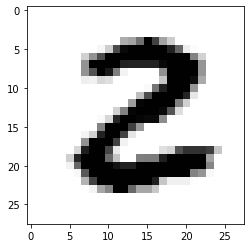

In [33]:
import matplotlib.pyplot as plt
index = 25
print(y_train[index])
plt.imshow(X_train[index], cmap='binary');

In [10]:
## Let's check no of categories are there
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [20]:
## There are total of 10 labels or features
y = y_train.reshape(-1, 1)

In [7]:
## Here data is already inbuilt
## Let's create a model
from tensorflow.keras import layers, models

In [41]:
model = models.Sequential([
                           layers.Flatten(),
                           layers.Dense(64,activation = 'relu'),
                           layers.Dense(128, activation = 'relu'),
                           layers.Dense(10, activation = 'softmax')
])

In [42]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [43]:
history = model.fit(X_train, y, epochs = 30, validation_split=0.2, batch_size = 32)

Epoch 1/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2971 - accuracy: 0.9130 - val_loss: 0.1697 - val_accuracy: 0.9509
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1283 - accuracy: 0.9607 - val_loss: 0.1254 - val_accuracy: 0.9627
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0917 - accuracy: 0.9715 - val_loss: 0.0975 - val_accuracy: 0.9732
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0688 - accuracy: 0.9780 - val_loss: 0.1179 - val_accuracy: 0.9643
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0556 - accuracy: 0.9822 - val_loss: 0.1107 - val_accuracy: 0.9692
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0473 - accuracy: 0.9848 - val_loss: 0.1111 - val_accuracy: 0.9694
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.1202 - val_accuracy:

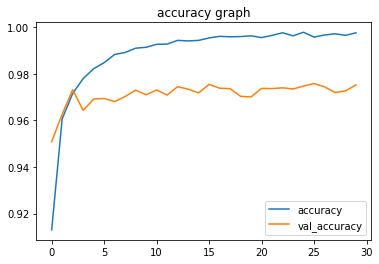

In [44]:
## Printing the accuracy graph and loss graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy graph')
plt.show()

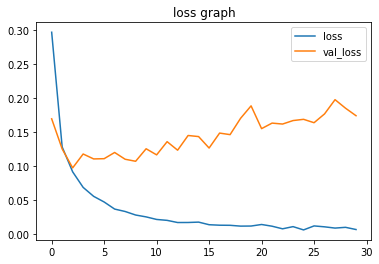

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss graph')
plt.show()

In [46]:
pred = model.predict(X_test)

In [66]:
import numpy as np

def get_index(pred):
    ind = []
    for p in pred:
      pd = 0
      indx = 0
      for i, val in enumerate(p):
          if val > pd:
              pd = val
              indx = i
      ind.append(indx)
    return np.array(ind)

In [67]:
from sklearn.metrics import accuracy_score

accuracy_score(get_index(pred), y_test)

0.9762